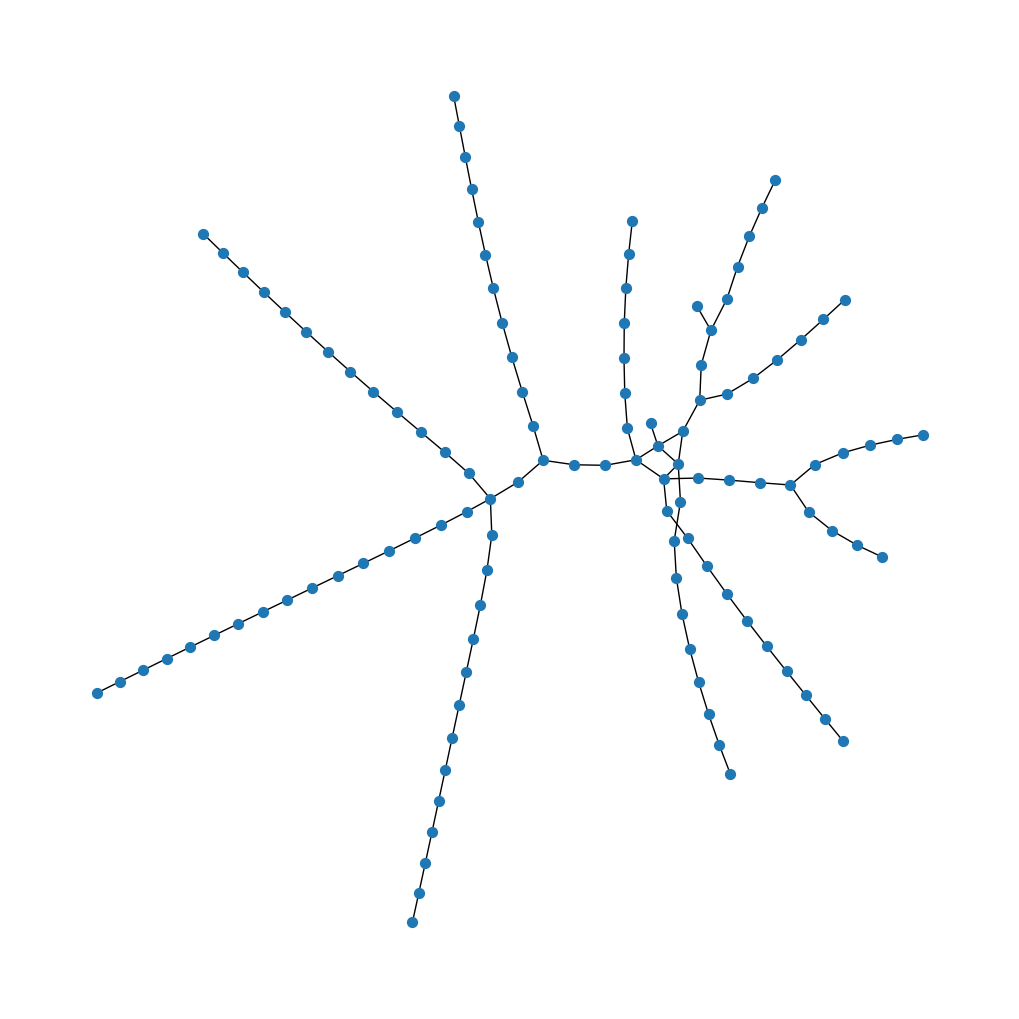

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def open_line_file(filename):
    with open(f'./lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [6]:
import json

delays_file = open("./delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
delays

nx.set_node_attributes(network, delays, "avg_delay")
nx.get_node_attributes(network, "avg_delay")

{'Suffolk Downs': -22.75,
 'Washington Square': 55.0,
 'Brookline Village': -171.0,
 'Tufts Medical Center': 95.1428571428571,
 'Heath Street': -948.25,
 'Quincy Adams': 437.0,
 'Beaconsfield': -142.5,
 'East Somerville': -10859.75,
 'Boston College': -338.5,
 'Porter': 516.6,
 'JFK/UMass': -42897.75,
 'Lechmere': -422.0,
 'Harvard Avenue': -341.8,
 'Revere Beach': 35.0,
 'Babcock Street': -321.0,
 'Quincy Center': 395.0,
 'Newton Highlands': 6.2,
 'Northeastern University': -1108.33333333333,
 'Gilman Square': -9638.22222222222,
 'Government Center': -43.75,
 'State': -65.75,
 'Arlington': -151.083333333333,
 'Museum of Fine Arts': -1085.0,
 'Blandford Street': -205.0,
 'Broadway': -14039.3333333333,
 'Central': 337.6,
 'Riverway': -884.0,
 'Community College': 129.166666666667,
 'Forest Hills': -17097.1,
 'Symphony': -354.5,
 'Malden Center': 95.0,
 'Maverick': -99.75,
 'Science Park/West End': -419.0,
 'Coolidge Corner': 43.0,
 'Kent Street': 96.0,
 'Chinatown': 87.1428571428571,
 '

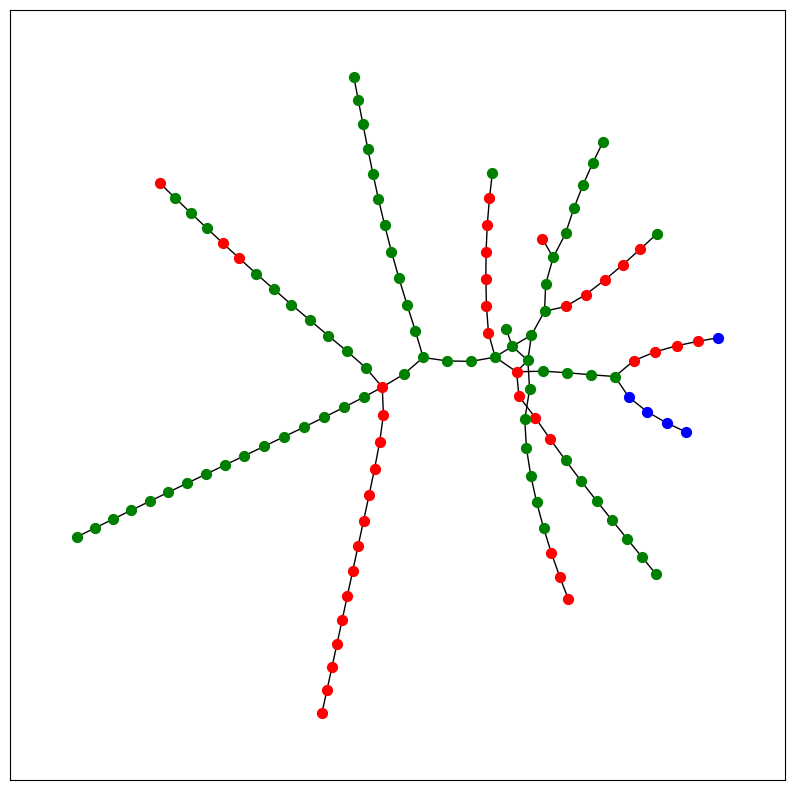

In [7]:
# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

In [14]:
avg_delay = nx.get_node_attributes(network, "avg_delay")

# Calculate the Katz centrality for each node
katz_centrality = nx.katz_centrality(network, alpha=0.1)


# Nothing compare the average delay with the Katz centrality for each node
for (node, delay) in nx.get_node_attributes(network, "avg_delay").items():
    print(f"Node {node}:")
    print(f"  Average delay: {delay}")
    print(f"  Katz centrality: {katz_centrality[node]}")


print(avg_delay.values())

Node Suffolk Downs:
  Average delay: -22.75
  Katz centrality: 0.09123182755813347
Node Washington Square:
  Average delay: 55.0
  Katz centrality: 0.09124034415299136
Node Brookline Village:
  Average delay: -171.0
  Katz centrality: 0.09126100735250531
Node Tufts Medical Center:
  Average delay: 95.1428571428571
  Katz centrality: 0.09148157934030983
Node Heath Street:
  Average delay: -948.25
  Katz centrality: 0.08202406160539107
Node Quincy Adams:
  Average delay: 437.0
  Katz centrality: 0.09031115361589746
Node Beaconsfield:
  Average delay: -142.5
  Katz centrality: 0.0912415042898425
Node East Somerville:
  Average delay: -10859.75
  Katz centrality: 0.09210702741027298
Node Boston College:
  Average delay: -338.5
  Katz centrality: 0.08202406160539107
Node Porter:
  Average delay: 516.6
  Katz centrality: 0.09114748656234518
Node JFK/UMass:
  Average delay: -42897.75
  Katz centrality: 0.10065199398573982
Node Lechmere:
  Average delay: -422.0
  Katz centrality: 0.09982054167

Correlation Coefficient of avg_delay and katz centrality: -0.03853734890031613


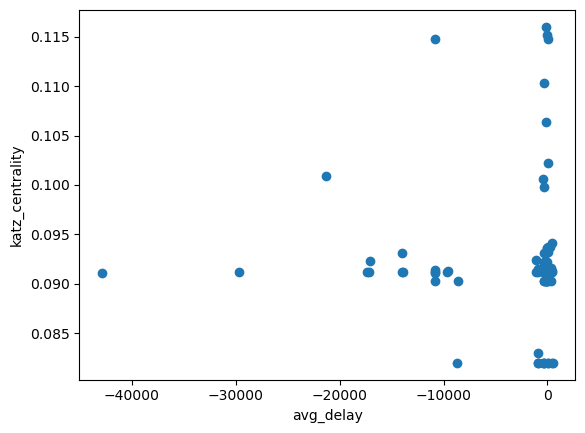

In [9]:
import pandas as pd

df = pd.DataFrame(list(zip(avg_delay.values(), katz_centrality.values())), columns=["avg_delay", "katz_centrality"])

# Calculate the correlation coefficient between the two variables
correlation = df["avg_delay"].corr(df["katz_centrality"])

# Print the correlation coefficient
print("Correlation Coefficient of avg_delay and katz centrality: " + str(correlation))

# Create a scatter plot of the two variables
plt.scatter(df["avg_delay"], df["katz_centrality"])
plt.xlabel("avg_delay")
plt.ylabel("katz_centrality")

# Show the plot
plt.show()